In [10]:
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib
import math # Import math
from scipy.integrate import quad    # Import quad from scipy
from scipy.special import p_roots # Import p_roots from scipy

In [11]:
def gauss_quad(f, a, b, *par): #Gauss quadrature methode
    I_prev = 0
    for i in range(2, 100):
        [x,w] = p_roots(i)
        summ  = 0
        for i in range(len(x)):
            summ += w[i]*f(0.5*(b-a)*x[i]+0.5*(b+a), *par)
        I = 0.5*(b-a)*summ
        if abs(I-I_prev) < 1e-5:
            return I
        else: I_prev = I


In [12]:
def Jcdensity2(x, a):
    y= []
    for i in range(len(x)):
        y.append(math.cosh(a*x[i])/math.cosh(a/2))
    return y

In [13]:
def Jcurrent2(x, a, k): #current density function
    return math.cosh(a*x)/math.cosh(a/2)* math.cos(k*x)

In [14]:
def Jcurrmax2(a): # max current
    return 2/a * math.tanh(a/2)

In [15]:
def oneparameter(chi):
    a = 2*chi
    x=[]
    y=[]
    jcmax = Jcurrmax2(a)
    for i in range(0,300):
        #val = quad(Jcurrent2, -0.5, 0.5, args=(a, 2*math.pi * i/20))
        val2 = gauss_quad(Jcurrent2, -0.5, 0.5, a,  2*math.pi * i/20) 
        x.append(i/20)
        y.append(abs(val2/jcmax))
        
    xx = np.linspace(-0.50, 0.50, 1000)
    yy  = Jcdensity2(xx, a)
    
    plt.style.use("seaborn-talk")
    

    fig, ax = plt.subplots()
    ax.plot(x, y, color = "m", lw = "2", linestyle = "-", label = r"$ \chi =%0.2f$ "%(chi))
    ax.set_title(r"Plot between $\frac{I_{1}(\phi)}{I_{1}(0)}$ vs $\phi/\phi_{0}$ for one-parameter current density profile ")
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_xlabel(r"$\phi/\phi_{0}$")
    ax.set_ylabel(r"$\frac{I_{1}(\phi)}{I_{1}(0)}$")
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 1.2)
    ax.fill_between(x, y, color = "m", alpha = 0.1)

    axins  = ax.inset_axes([0.47, 0.47, 0.4, 0.4], zorder = 2)
    axins.grid(True, linestyle='--', linewidth=0.5)
    axins.set_xlim(-0.5, 0.5)
    axins.set_xlabel(r"$L$")
    axins.set_ylabel(r"$J_{1}$")
    axins.plot(xx, yy, color = "green", lw = "2", linestyle = "-", alpha=1)
    axins.set_title("current density")
    axins.fill_between(xx, yy, color = "lightgreen", alpha=0.3)
    # axins.set_ylim(0, 1.1)
    plt.legend()
    # fig = plt.gcf()
    # fig.set_size_inches(12, 8)
    #plt.savefig("plotting\Plot2_chi%0.2f.png"%(chi))
    plt.show()
    

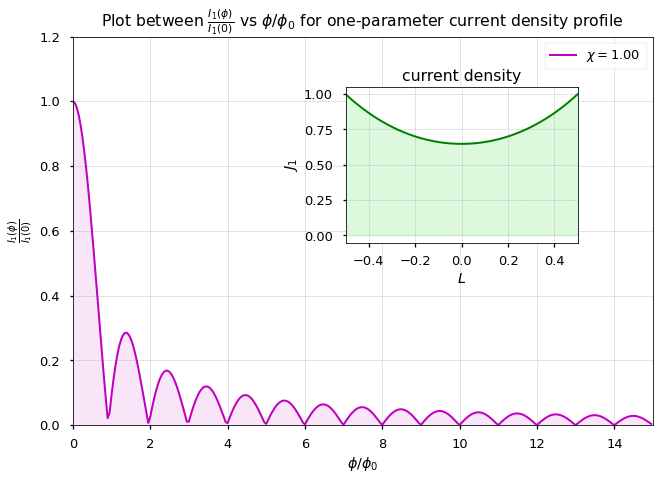

In [16]:
oneparameter(1)

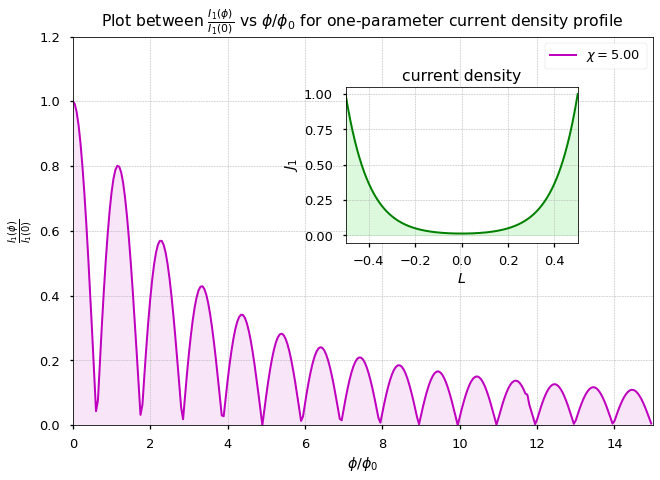

In [17]:
oneparameter(5)

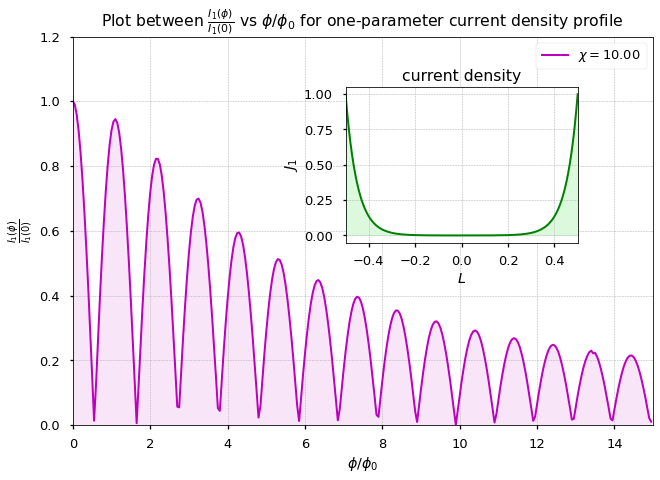

In [18]:
oneparameter(10)